In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('Task_1_data.csv')

In [2]:
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
16711,spam,C'est la 2ème fois que nous avons essayé 2 con...
16712,ham,Est-ce que ü b ira à l'esplanade en maison?
16713,ham,"Dommage, * était d'humeur pour ça. Donc... d'a..."
16714,ham,Le type a fait une saloperie mais j'ai agi com...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  16716 non-null  object
 1   text    16716 non-null  object
dtypes: object(2)
memory usage: 261.3+ KB


In [4]:
df['labels'].value_counts()

labels
ham     14475
spam     2241
Name: count, dtype: int64

In [5]:
df.isna().value_counts()

labels  text 
False   False    16716
Name: count, dtype: int64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['labels']
tfidf = TfidfVectorizer(stop_words='english') 
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy * 100}')

Accuracy = 97.09928229665071


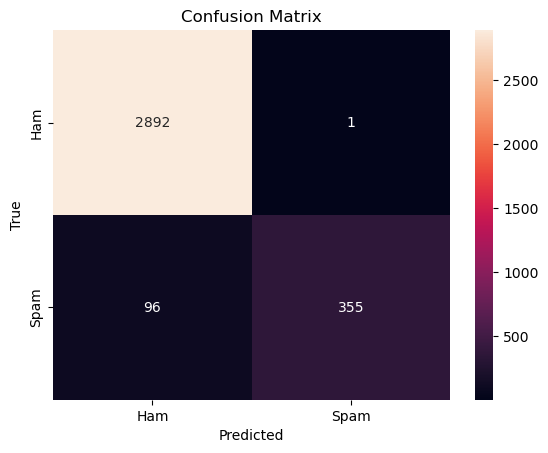

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()